# Investigating the evolution of antibiotic resistance by protein language models

# 1 Introduction

The use of antibiotics has become one of the most fundamental methods in medicine. While there are various different kinds, many antibiotics are based on a beta-lactam ring in their chemical structure. Bacteria can become resistant to this group of antibiotics by producing beta-lactamases. These are a protein family with the ability to break the beta-lactam ring and make the antibiotic ineffective. With every resistance bacteria creates, science needs to develop new antibiotics or ideas against it to continue being helpful for health care. This coevolution between microorganisms and other life forms has been taking place in nature for thousands of years and can now be highly improved with modern techniques like empirical and computational science, simulation and even artificial intelligence. By finding out the details of the chemical reaction taking place and which parts of an enzyme are really responsible, science has a great chance of evolving effective medicine against them. This thesis tackles numerous methods of examining the beta-lactamase protein family with consideration of the amino acid sequences, and data of an AI-model specialized for representation of biological characteristics. Data about the family's variants and phenotypes are available. Among the vast mutational space of a 286-residue protein -including single, double and more simultaneous amino acid substitutions- the question which sequence variants yield an active beta-lactamase, and what distinguishes them in terms of functional and structural characteristics, will be discussed in this thesis. 

# 2 Theoretical Background
## 2.1 Beta-Lactamase

The TEM beta-lactamase is a protein family which is an important part of this evolution concerning antibiotic resistance for bacteria. Usually, if there is a bacterial infection, antibiotics will either kill bacteria or stop them from growing, by targeting important parts like their cell wall or their function. Of course, as every organism evolves, this will set a strong selective pressure on them, and if there were a mutation with which a bacteria would evade this process, it would instantly have an adaptive benefit. One way of achieving this, is by producing enzymes, which destroy antibiotics before they reach the organism, so that it won't be harmed [1]. One kind of these enzymes is the TEM beta-lactamase family, which this thesis will discuss. 
Within the protein family there are many different variants, which stop slightly different antibiotics. These variants have developed over a long evolutionary timescale, because changes in the antibiotic cause new resistance in the same way. As soon as the pharmacy uses a different antibiotic, bacteria with a mutated enzyme will evolve due to its survival advantage. This figure symbolically shows the process: 


<div style="display: flex; justify-content: center; gap: 10px;">
  <img src="pictures/9c1563d2-833e-4445-aa7e-0aedd22552a6.png" width="200">
  <img src="pictures/2b5e10c6-96a3-4740-8451-f45003a1f78b.png" width="200">
  <img src="pictures/12cd8408-4d78-4065-9e33-e0fcf726a57b.png" width="200">
</div>
<p style="text-align: center;"><strong>Figure 1:</strong> Symbolic picture of lactamase evolution [ChatGPT]</p>


At a chemical level, like mentioned before, the antibiotics these enzymes destroy have a beta-lactam ring in their structure. This is the element, targeted by the lactamase. The ring is opened and in that state the antibiotic is unstable, because it can spontaneously decarboxylate [4]. As a result, the antibiotic becomes ineffective and the bacteria unharmed. 

<div style="text-align: center;">
  <img src="pictures/reaction.jpg" width="750"><br>
  <strong>Figure 2:</strong> Reaction of the bacterium to the antibiotic. [4]
</div>



The beta-lactamase family consists of about 250 TEM-variants, which differ slightly in their sequence by amino acids and length. Most of the variants contain 286 amino acids. The proteins can be visualized as a network with all proteins as nodes and with edges that represent one mutation each. That means, proteins that are connected directly only differ by one amino acid in their sequence and two nodes far away from each other have mutated a lot between them in evolution. A phylogenetic tree would be a different approach of showing the arrangement of the family, but in this case there are multiple similarly likely evolutionary paths within the network, so one wouldn't want to settle for one specific possibility [1]. Broadly, the proteins are divided into 4 main phenotypes, represented by different color in the network.

<div style="text-align: center;">
  <img src="pictures/network.jpg" width="600"><br>
  <strong>Figure 3:</strong> Network of beta-lactamase family [1]
</div>


By examining centered nodes and various branches, there are multiple clusters formed, which are close together regarding the sequence and considering the colors this is predominantly also the subdivision of phenotypes, though there are many counterexamples. Also the large green nodes in the hearts of two large clusters represent TEM-116 at the bottom right and TEM-1 in the middle [1]. Looking at this data, it's reasonable to assume the TEM-1 beta-lactamase to be the origin of the protein family, but that is not certain. Still, if a reference is needed to analyze the data, one would choose this protein. 
Because the network is highly connected and the protein family is pretty similar in general, there are many structures that are called quartets. They form a rectangle with 4 nodes and 4 edges, so that one protein mutates once into two new sequences and the combination of these two changes is also included in the network, thus results in an active variant [1]. 
With these quartets the idea arises, that further active variants could be predicted if the first three parts of a quartet are discovered. So if two individual mutations from the same sequence will both be active, then the sequence with both mutations often results in an active variant too [1]. With this approach a lot of new variants were discovered and added to the database, before they have been found in nature or they have even evolved. 
With this large set up network of the beta-lactamase family it's generally determined, which mutations result in an active variant and what specific phenotype they correspond to. The mutations and its effects within the family will be investigated using the database and the AI-model ESMc, which is explained in the next chapter. 

## 2.2 AI-model ESMc

The AI-model used to help analyze the protein family in this project is a protein language model, named ESMc. Like many text language models, data is divided into tokens. In most language models, an early challenge is the choice of what represents a token, because the alphabet could end up too small or too large for efficient training, but in this case the use of each amino acid as one token is a naturally suitable method. The space of all possible tokens contains the 20 occurring amino acids. [3]
This is the first step for the AI-model, the tokenization of sequence data. ESM3 is a generative multi-model version, in which all modalities of proteins such as sequence, structure and function are divided into tokens, and the model generates missing tokens, so a prompt could be a specific function or a combination of characteristics and ESM3 will return the full desired protein [2]. ESMc on the other hand is representation focused. It tokenizes and processes only sequence data and is focused on representing the biological data as embeddings. The tokenized sequence is embedded into vectors, through multiplication with a weight matrix, which is developed through training. The resulting vectors for each protein exist in a high dimensional vector space and can be considered as a latent space, in which geometric difference between vectors resemble biological difference of the proteins regarding the structure, function and sequence. The geometric similarity of two vectors is defined through the angle of vectors, so the smaller the angle between them, the more similar the AI-model scores the according proteins. Accessing this data will enable more flexible computational examination of mutations and their effects within the beta-lactamase family. [3]
For training, the model gets a sequence as an input, in which some random tokens have been masked beforehand. Based on deep contextual and structural patterns across large data of sequences, structures and functional annotations, the masked token is predicted and the model is scored according to this accuracy. 

<div style="text-align: center;">
  <img src="pictures/training.jpg" width="600"><br>
  <strong>Figure 3:</strong> ESMc Training [3, and ChatGPT]
</div>


## 2.3 Sequence alignment and Neo4j

Like mentioned before, not all sequences have the same length. The question is how this is handled in the database, because depending on how the sequences are aligned, the number of mutations between them varies. The common sequence alignment in bioinformatics is used, where highest score of similarity is pursued. The results are methods intuitive. In case of one or more amino acids missing at the beginning of a sequence, the sequence is shifted to right by the number of missing residues. Now instead of nearly all position being considered mutations, they all match again. One or more inserted amino acids somewhere within the sequence would also distort the mutation count without alignment, because nearly no residue would match after they have been moved to the right by the inserted amino acids. Normally this is happens in a loop of the protein structure, because a difference in length doesn't have a significant effect on the structural interactions in a protein. A loop is flexible, unstructured region that connects more complex secondary structures like alpha-helixes and beta-sheets. In this case the inserts are taken out of the sequence, and are not considered mutations. Another way to think about this is, putting gaps in the reference sequence in the residues, where the inserted amino acids exist in the other sequence. This also doesn't cause any further mutations and the biological message, the logical similarity of two sequences, is contained. 
The database through which information about the beta-lactamase family is accessed is Neo4j. Neo4j is a graph database made for storing not only iterative lists of information, but connected elements. It contains entities, relationships between them and an organizing principle [7]. In this case, all proteins and their data like sequence and phenotype are stored as nodes with relationships connecting them containing information about mutations. Mutations are also only stored if they exist after the alignment. Moreover, every amino acid in every sequence gets a standard number, which is their position also after the alignment.

# 3 Methods

## 3.1 Setup Section

For processing data in the python code, at the beginning some initialization is needed. First pyeed libraries are imported and access to the data file is being established.

In [19]:
from pyeed import Pyeed
from pyeed.analysis.embedding_analysis import EmbeddingTool
from pyeed.model import Protein

import sys
from loguru import logger
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Patch
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'


logger.remove()
level = logger.add(sys.stderr, level="INFO")

uri = "bolt://129.69.129.130:7687"
user = "neo4j"
password = "12345678"

eedb = Pyeed(uri, user=user, password=password)
et = EmbeddingTool()
df = pd.read_csv("recources/data_example.csv", delimiter=";")

# create a dict with protein_id_database as key and phenotype as value
dict_data = dict(zip(df["protein_id_database"], df["phenotype"]))

# Get all proteins
proteins = Protein.nodes.all()
proteins = [p for p in Protein.nodes.all() if p.accession_id != "P41365"]
reference_protein_id = "AAP20891.1"  

📡 Connected to database.


## 3.2 Sequence Comparisons

The most definite aspect of a protein is its amino acid sequence. Each protein in the family differs by a small number of residues (often less than 5 positions) which determines details of the respective structure and function and therefore this is a fundamental characteristic worth looking into. The first approach is accessing the sequences as lists and let an algorithm go through two of those simultaneously to compare each amino acid. This function examines two sequences, reporting details about mutations relative to the first sequence and calculating the percentage of matching amino acids as a measure of similarity. In case one would be interested in a specific section of the sequences (maybe considering an active site or unusual mutations) there is the possibility to limit the comparison to some particular indexes as arguments.

In [20]:

def sequence_comparison(id1, id2, start=0, end=285):
    """
    Compare two protein sequences by accession ID and report point mutations.

    Args:
        id1, id2 (str): Accession ID of the first protein sequence.
        start, end (int, optional): Start index (0-based) of the sequence region to compare. Defaults to 0.
        
    Returns:
        tuple:
            - n_o_d (int): Number of differences (point mutations).
            - similarity_percentage (float): Percentage of identical residues.
            - mutations (dict): Dictionary mapping amino acids (1-letter code) to the number of times they appear as mutations in seq2.
            - mutation_positions (list): List of 1-based positions where mutations occur.
    """
    seq1_list = list(Protein.nodes.get(accession_id=id1).sequence)
    seq2_list = list(Protein.nodes.get(accession_id=id2).sequence)
    mutations = {aa: 0 for aa in "ACDEFGHIKLMNPQRSTVWY"}
    n_o_d = 0
    similarity = 0
    mutation_positions = []
    i = start
    for i in range(start, end + 1):
        if seq1_list[i] != seq2_list[i]:
            n_o_d += 1
            mutations[seq2_list[i]] += 1
            mutation_positions.append(i + 1)
        else:
            similarity = similarity + 1
    similarity_percentage = (similarity / (end - start + 1)) * 100
    return n_o_d, similarity_percentage, mutations, mutation_positions


 
Though this function is a perfect groundwork to compare two sequences directly, this is not flexibly employable in the long run, because of the sequence alignment mentioned before. In case of an insert, a loop or difference in length, this algorithm would return far more mutations than after an alignment and than biologically rational. Therefore we use the neo4j database with information of the standard number for each amino acid in a sequence. Also in the graph database only mutations after standard numbering are registered in a relation between two nodes, thus using neo4j evades counting irrelevant differences between sequences. The details recorded in the database are the positions that mutate in each respective individual sequence as "from positions" and "to positions". Additionally there is a standard numbering node connected to every protein with a list of standard numbers fitting all positions of its sequence. For accessing the important data from neo4j, one can assign variables in python to strings with the same queries that would be accepted in the graph database as a command. The first 5 queries need two protein IDs as arguments, to return both positions, original and new amino acid and the number of mutations. The last query will get the standard numbering list out of one protein id, for further use. 


In [21]:

query_from = """
MATCH (p1:Protein {accession_id: $id1})-[f:MUTATION]-(p2:Protein {accession_id: $id2})
RETURN f.from_positions 
"""

query_to = """
MATCH (p1:Protein {accession_id: $id1})-[f:MUTATION]-(p2:Protein {accession_id: $id2})
RETURN f.to_positions 
"""

query_from_monomers = """
MATCH (p1:Protein {accession_id: $id1})-[f:MUTATION]-(p2:Protein {accession_id: $id2})
RETURN f.from_monomers
"""

query_to_monomers = """
MATCH (p1:Protein {accession_id: $id1})-[f:MUTATION]-(p2:Protein {accession_id: $id2})
RETURN f.to_monomers
"""

query_n_o_d = """
MATCH (p1:Protein {accession_id: $id1})-[f:MUTATION]-(p2:Protein {accession_id: $id2})
RETURN
  size(
    f.from_positions
  ) AS mutation_count
  """

query_SN = """
  MATCH (p:Protein {accession_id: $id})-[f:HAS_STANDARD_NUMBERING]-(s:StandardNumbering)
  RETURN f.positions 
"""

With the queries all tools to write a new sequence comparison with standard numbering are available. Mutations between two proteins are gathered from neo4j with their id. As soon as a mutation has a different position in the first and the second protein, these positions are assigned with their standard number, which has to be the same by definition. Next information about the monomer is added. The following code puts this in practice. 

In [22]:
def sequence_comparison_query(id1, id2):
    """
    Compare two protein sequences and return mutation details.
    
    Parameters:
        id1 (str): Accession ID of the reference protein.
        id2 (str): Accession ID of the mutated protein.
        
    Returns:
        tuple: (number_of_mutations, mutation_positions, mutated_amino_acids)
    """
    # Get number of mutations and the new amino acids
    n_o_d = eedb.db.execute_read(query_n_o_d, {"id1": id1, "id2": id2})[0]['mutation_count']
    new_AA = eedb.db.execute_read(query_to_monomers, {"id1": id1, "id2": id2})[0]['f.to_monomers']

    # Get mutation positions from and to
    result_from = eedb.db.execute_read(query_from, {"id1": id1, "id2": id2})[0]['f.from_positions']
    result_to = eedb.db.execute_read(query_to, {"id1": id1, "id2": id2})[0]['f.to_positions']

    # Map to standard numbering if available and consistent
    for i in range(len(result_from)):
        if result_from[i] != result_to[i]:
            index_from = result_from[i]
            index_to = result_to[i]
            result_SN_from = eedb.db.execute_read(query_SN, {"id": id1})[0]['f.positions']
            result_SN_to = eedb.db.execute_read(query_SN, {"id": id2})[0]['f.positions']
            assert result_SN_from[index_from - 1] == result_SN_to[index_to - 1], f"Standard numbering mismatch at index {i}"
            result_from[i] = result_SN_from[index_from - 1]

    mutation_positions = result_from
    return n_o_d, mutation_positions, new_AA


## 3.3 Mutations per Position

At this point a foundation is set, for plotting some interesting results. The first question arising when looking into a protein family, is what positions mutate how often and into which amino acids. For this purpose multiple sequences need to be compared and the resulting amino acids noted. As a reference protein of cause the TEM-1 beta-lactamase is very suitable, because on average proteins have the least mutations with it. If one for example would choose the only protein in the family that mutations at a certain point, the result would be the total number of proteins minus one as number of mutations. To gather all considered information, every sequence needs to be compared with the reference protein. The results are stored in "mutation_values" and "mutation_lists".

In [23]:
mutation_values = []
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

def values_and_details(ref_id):
    """
    Calculate mutation values and details for a reference protein.

    This function compares the sequence of a reference protein (identified by `ref_id`)
    to all other proteins in the `proteins` list. It counts the occurrences of amino acid
    substitutions at each position where a mutation occurs.

    Parameters:
    ----------
    ref_id : str
        The accession ID of the reference protein.

    Returns:
    -------
    mutation_values : list of int
        A list containing the total number of mutations at each position of the reference protein.
        
    mutation_details : dict
        A dictionary where each key is a position (0-based index) in the protein sequence,
        and the value is another dictionary mapping each amino acid to the number of times
        it appeared as a mutation at that position.
    """
    num_positions = len(Protein.nodes.get(accession_id=ref_id).sequence)

    # Initialize mutation counts for each position and each amino acid
    mutation_details = {pos: {aa: 0 for aa in amino_acids} for pos in range(num_positions)}

    for protein in proteins:
        if protein.accession_id != ref_id:
            # Compare the sequences and extract mutation positions and new amino acids
            m_positions = sequence_comparison_query(ref_id, protein.accession_id)[1]
            new_aa = sequence_comparison_query(ref_id, protein.accession_id)[2]

            for i in range(len(m_positions)):
                pos = int(m_positions[i]) - 1  # Convert to 0-based index
                aa = new_aa[i]
                mutation_details[pos][aa] += 1

    # Calculate total number of mutations per position
    mutation_values = [
        sum(aa_counts.values())  
        for aa_counts in mutation_details.values()
    ]

    return mutation_values, mutation_details


## 3.4 Embeddings and Mutations

Now that information about mutations within the TEM beta-lactamase is accessible, there is a wide range of possibilities to explore. In the long run, details about small changes in the sequence won't be the interesting part, but instead its effect. All proteins in the database belong to the same family, so they do have a very similar function. That makes it interesting to see, what changes are possible in this space of active variants and what consequences they have. Considering the use of the AI-model ESMc, which gives information about the similarity of two proteins concerning not only the sequence, one could make an assumption. The guess would be, that the more mutations there are with two sequences, the less similarity the AI-model will rate between those two proteins. Comparing these characteristics for each pair of proteins will support or contradict this hypothesis. To put that in practice, first a suitable method to quantify the similarity is needed. As described in the theoretical background, each protein gets an assigned embedding vector and the smaller the angle between them, the closer the proteins are located in the latent space. A convenient calculation would be the cosine similarity, because then the value 1 would mean two proteins are identical, a 0 would be orthogonal and two completely different proteins would have a similarity of -1 and these values are pretty intuitive. Theoretically that gives us a range of two, but because all proteins which will be compared with their vectors are part of the same family, practically the values only vary between 1 and 0,97. So if they're rounded to precision, this isn't a problem. In python the formula for the cosine similarity can be used for a function calculating this value for two vectors.


$$
\text{cosine\_similarity}(\mathbf{A}, \mathbf{B}) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \cdot \|\mathbf{B}\|}
$$

In [24]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    cosine_sim = dot_product / (norm_vec1 * norm_vec2)
    return cosine_sim


The embedding vectors can be retrieved from neo4j with a query. For implementation, all proteins are compared with each other, as there is no reason to use TEM-1 as a reference in that case. Also this approach analysis more data and thus has more meaningful results. Of cause the computation needed rises significantly, because the complexity is quadratic. For every comparison, the according number of mutations and cosine similarity are stored as a dictionary with the protein IDs of the compared lactamase. 


In [25]:
# Query Neo4j to retrieve protein embeddings and map them to their accession IDs
query = """
MATCH (p:Protein) RETURN p.embedding AS embedding, p.accession_id AS accession_id 
"""
result = eedb.db.execute_read(query)

# Create a dictionary mapping each accession ID to its embedding vector
dict_query = {record["accession_id"]: record["embedding"] for record in result}

# Initialize list to hold mutation counts and embedding similarities between protein pairs
mutations_and_embeddings = []

# Iterate over all unique protein pairs
for i, protein1 in enumerate(proteins):
    for j, protein2 in enumerate(proteins[i + 1:]):
        # Compute number of mutations between the two sequences
        n_o_d = sequence_comparison_query(protein1.accession_id, protein2.accession_id)[0]
        
        # Calculate cosine similarity between the two embedding vectors
        vector1 = dict_query.get(protein1.accession_id)
        vector2 = dict_query.get(protein2.accession_id)
        vector_similarity = cosine_similarity(vector1, vector2)
        
        # Store the results as a dictionary in the list
        mutations_and_embeddings.append({
            "protein1": protein1.accession_id,
            "protein2": protein2.accession_id,
            "mutations": n_o_d,
            "cosine_similarity": vector_similarity
        })

# Convert the list of results into a pandas DataFrame for further analysis
mutations_and_embeddings_df = pd.DataFrame(mutations_and_embeddings)


## 3.5 Relevance per Position

With data about the correlation between number of mutations and cosine similarity of the embedding vectors in a protein comparison, indirectly, there is more information following with it. For example of cause there are multiple comparisons with the same number of differences in the sequences, but a distinct cosine similarity each. In other words, certain changes in the sequence effect structure and function differently, regardless of the number of how many amino acids change. There are two main additional characteristics of sequence differences to the number of mutations. Firstly a mutation can result in multiple amino acids, so there are 19 possibilities for each change in sequence. That the cosine similarity changes depending on the resulting amino acid, biologically makes perfect sense. As each amino acid has slightly different characteristics like size, charge, polarity and hydrophobicity, they simultaneously have slightly different function for the overall structure, by changing shape, length or side chain interactions. This is the reason why some new amino acids will carry more weight for a change in structure, thus a lower similarity. Mutations with the original and the resulting amino acid being similar will most likely be rated to be similar by the AI-model and also are more common in nature, because the protein will need to conserve its primary function and structure. Secondly, the positions of mutations happening could have a significant effect on the cosine similarity. Viewing a sequence not only as a chain of amino acids, but as the 3D structure it folds up to, it becomes clear that the standard number of a mutation determines the exact location of a change in the protein. Considering various places of a protein like its interaction with the substrate (the antibiotic in this case), a binding site, regions at the surface or loops, it is a logical assumption, that the significance of a change depends on where it takes place. For example, an amino acid mutating, which is in any contact with the substrate, will likely have a larger effect on the function, than some amino acid in a loop, sticking out of the surface. This essay will tackle and develop methods for the second point regarding relevance per position.
With Data containing the position of mutations and the resulting cosine similarity, there are tools available, to rate each position with its relevance for the overall protein function. The relevance of a position in a sequence could reveal valuable insight on details regarding function and composition of the protein. To approach this problem a relevance depending on the cosine similarity needs to be defined. The lower the similarity is, the more relevant will the position be, because it changing seems to have a relatively large effect. There are various possibilities for a formula, but for now this idea will be used:

$$
\textit{relevance}(comparison) = c \ast \left( \left( \frac{1}{\mathbf{s_c}} \right) - 1 \right)
$$

C works as a normalization constant and the minus one is calculated so that the values start at 0 instead at 1. This is the formula for one comparison and the s_c is the cosine similarity between these two proteins. Theoretically there is a risk of division by zero, but in practice, like mentioned before, the cosine similarity doesn't get lower as 0.97. Now that a basic formula is defined, the base is set, but of course one comparison is not meaningful to determine the position relevance of the according mutations. Starting with comparisons in which exactly one amino acid changes, a reasonable idea is to calculate the average of all relevance results for each position. So mathematically, all comparisons with the desired position are summed up and divided by the number of those comparisons. This can be calculated analogous for every position. 

$$
\textit{relevance}(p) = c \cdot \left( \frac{1}{|M(p)|} \cdot \sum_{i \in M(p)} \left( \frac{1}{s_i} - 1 \right) \right)
$$

M(p) represents all mutations at position p and |M(p)| is the number of those mutations. Now considering all comparisons, with any number of mutations, a normal average would distort the result, because in a lot of cases the cosine similarity not only depends on one position, but on multiple ones, so it's not clear if the effect is caused by that certain position or another (or a combination). The more amino acids mutate between two specific proteins, the less the relevance of that comparison should be considered in calculating the overall relevance. The key to put this in practice is a weighted average. As weights, one divided by the total number of mutations in the according comparison makes sense. Like that, the less amino acids changed, so the more the according position was a part of the effect in cosine similarity, the more will the relevance be calculated into the average. This means m_i is the total number of mutations in the comparison with the mutation at position p. 

$$
\textit{relevance}(p) = c \cdot \frac{\sum_{i \in M(p)} \left( \frac{1}{m_i} \left( \frac{1}{s_i} - 1 \right) \right)}{\sum_{i \in M(p)} \frac{1}{m_i}}
$$

Mathematically, the calculation of a relevance is complete with this formula for each position. In the python code first all proteins are compared and their number and positions of mutations, protein IDs and cosine similarity of each protein pair is stored in a dictionary. Then, all pairwise comparisons are iterated through and in every iteration the relevance, depending on the cosine similarity and the weights, depending on the number of mutations (so the length of the list of all positions) are calculated. Then the code iterates through the list of mutated positions and the results are stored as a tuple in a new dictionary to the according positions. 

In [26]:
# List to store mutation and embedding comparison results between protein pairs
mutations_embeddings_positions = []

# Loop through each protein and compare it to all subsequent proteins
for i, protein1 in enumerate(proteins):
    for j, protein2 in enumerate(proteins[i + 1:]): 

        # Perform a sequence comparison between the two proteins
        result = sequence_comparison_query(protein1.accession_id, protein2.accession_id)
        n_o_d = result[0]  # Number of differences (mutations)
        positions = result[1]  # Mutation positions

        # Compute cosine similarity between the two embedding vectors
        vector1 = dict_query.get(protein1.accession_id)
        vector2 = dict_query.get(protein2.accession_id)
        vector_similarity = cosine_similarity(vector1, vector2)

        # Store results in a dictionary
        mutations_embeddings_positions.append({
            "protein1": protein1.accession_id,
            "protein2": protein2.accession_id,
            "mutations": n_o_d,
            "cosine_similarity": vector_similarity,
            "mutation_positions": positions
        })


In [27]:
# Stores a list of (relevance, weight) for each position
position_relevance = {i: [] for i in range(287)}  # Positions 0 to 286

# Collect weighted relevance scores for each mutated position
for entry in mutations_embeddings_positions:
    positions = entry["mutation_positions"]
    cosine_similarity = entry["cosine_similarity"]

    # Calculate relevance: higher when embeddings are less similar
    relevance = ((1 / cosine_similarity) - 1) * 100
    weight_per_pos = 1 / len(positions)  # Evenly distribute weight across positions

    # Assign weighted relevance to each valid position
    for pos in positions:
        pos = int(pos)
        position_relevance[pos].append((relevance, weight_per_pos))
        


For the final calculation step, the formula is applied individually for every position in python code. For all positions in position_relevance, the value and according weight in one tuple are multiplied, the results are summed up. That returns the weighted sum. Also the code calculates the sum of all weights for one position. Dividing the weighted sum of relevances by the sum of the weights results in the weighted average of relevances for one position. This is done for every position and when all of them are calculated, the final relevance value for all 286 amino acid positions are stored in weighted_average_relevance.

In [28]:
# Dictionary to store the final weighted average relevance for each position
weighted_average_relevance = {}

# Compute weighted average relevance for each position
for pos, values in position_relevance.items():
    total_weight = sum(weight for _, weight in values)
    weighted_sum = sum(relevance * weight for relevance, weight in values)

    if total_weight > 0:
        # Compute weighted average
        weighted_average_relevance[pos] = weighted_sum / total_weight
    else:
        # If no values available, set relevance to 0
        weighted_average_relevance[pos] = 0


# 4 Results

This chapter presents and discusses the results obtained from the data using the developed algorithms. General findings are mentioned, the expected results are compared with actual outcomes and exceptions are examined. 

## 4.1 Mutations per Position

The result of the how many mutations occur at each position in the protein family, is visualized in a histogram with reference to the TEM-1 sequence on the x-axis. On the y-axis one can see the exact number of proteins with a different amino acid on that position. The columns additionally are divided into colors representing the new amino acids, so the data of how often which one replaced the original amino acid is also stored in the plot. 

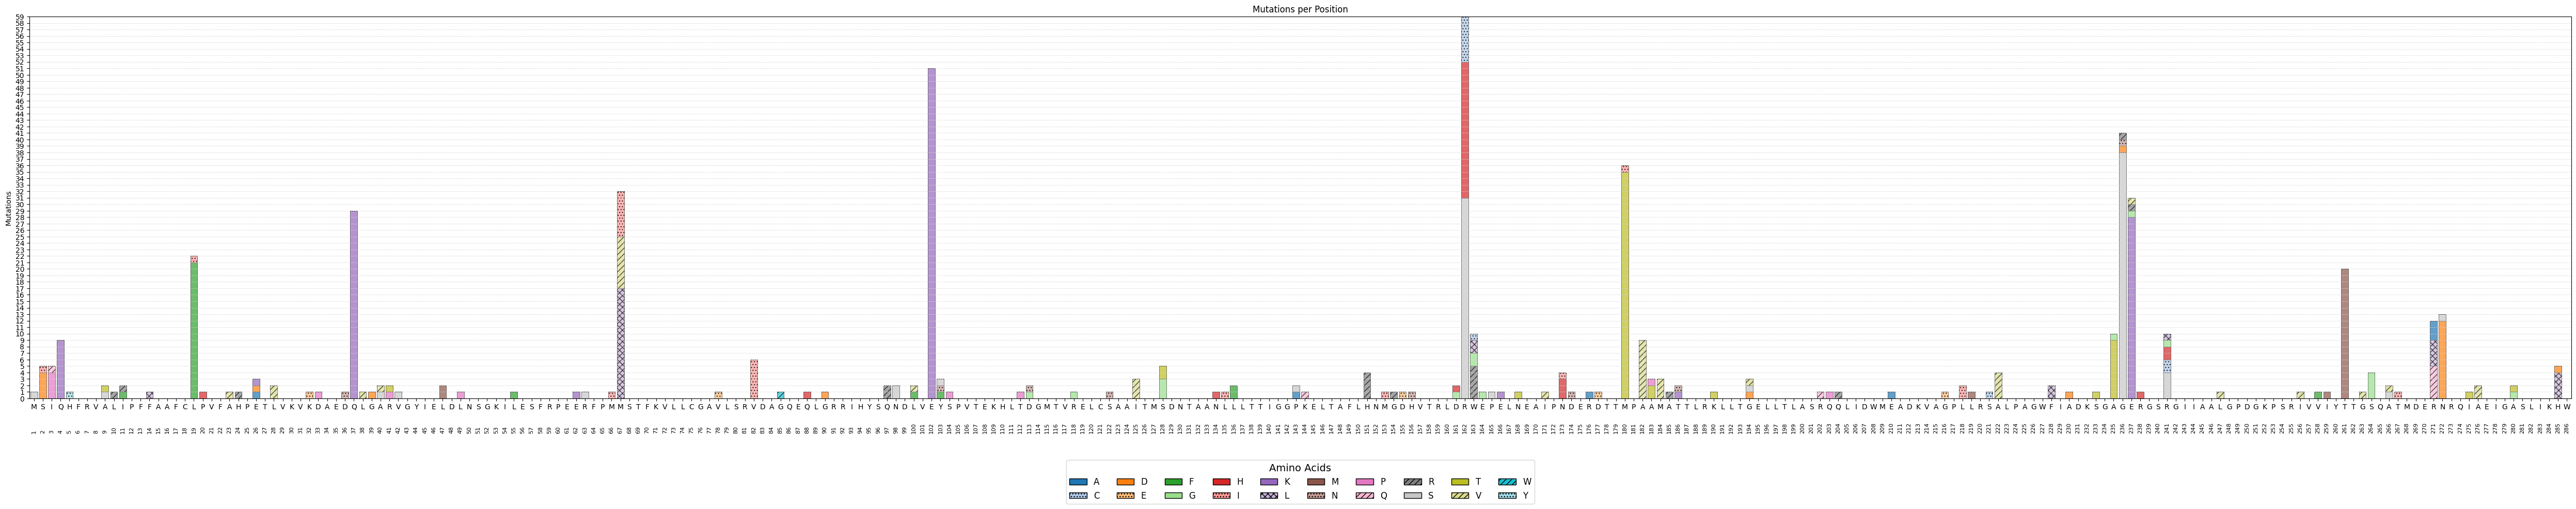

In [29]:
# Load mutation data and reference sequence
mutation_values, mutation_details = values_and_details(reference_protein_id)
ref_seq = list(Protein.nodes.get(accession_id=reference_protein_id).sequence)
positions = list(range(1, len(ref_seq) + 1))

# Define amino acid colors and hatch patterns
aas = 'ACDEFGHIKLMNPQRSTVWY'
colors = cm.tab20(np.linspace(0, 1, len(aas)))
aa_colors = {aa: colors[i] for i, aa in enumerate(aas)}
hatches = {'W': '///', 'Y': '...', 'V': '///', 'L': 'xxx', 'R': '///', 'Q': '///',
           'N': '...', 'C': '...', 'E': '...', 'I': '...'}

# Initialize plot
plt.figure(figsize=(50, 10))
bottom = np.zeros(len(positions))

# Sort mutations by frequency per position
sorted_details = [sorted(mutation_details[p].items(), key=lambda x: x[1], reverse=True) for p in range(len(positions))]

# Draw stacked bars
for i, pos in enumerate(positions):
    for aa, count in sorted_details[i]:
        plt.bar(pos, count, bottom=bottom[i], color=aa_colors.get(aa, "#000000"),
                edgecolor="k", alpha=0.7, linewidth=0.5, hatch=hatches.get(aa))
        bottom[i] += count

# Custom legend
legend_patches = [Patch(facecolor=c, edgecolor="k", hatch=hatches.get(aa), label=aa) for aa, c in aa_colors.items()]
plt.legend(handles=legend_patches, title="Amino Acids", loc='upper center',
           bbox_to_anchor=(0.5, -0.15), fontsize=12, title_fontsize=14, ncol=len(legend_patches) // 2)

# Labels and ticks
plt.ylabel('Mutations')
plt.title('Mutations per Position')
plt.xticks(positions, ref_seq[:len(positions)], fontsize=10)

# Add numeric position labels below x-axis
y_offset = -0.025 * len(proteins)
for i, pos in enumerate(positions):
    plt.text(pos, y_offset, str(i + 1), rotation=90, fontsize=8, ha="center")

# Y-ticks as integers
plt.yticks(range(0, int(max(bottom)) + 1))
plt.grid(axis='y', color='lightgrey', linestyle='--', linewidth=0.5)
plt.xlim(min(positions) - 0.5, max(positions) + 0.5)

# Save and show plot
plt.tight_layout()
plt.savefig("Mutations_per_Position.png")
plt.show()  


This plot gives a clear overview of how the lactamase family varies throughout its proteins. On the one hand it is interesting in which regions all proteins have the same amino acids, because considering them all having the same function, these regions could contribute to it more likely than segments where the proteins differ from each other a lot. On the other hand one could look at some spikes in the diagram. For example at position 102, there are 51 proteins, which contain a lysine instead of a glutamic acid there and lysine is also the only amino acid in the family apart from the original one at position 102. This is uncommon, not only because of the quantity of how many mutations there are, but also an acid is unlikely to mutate to a base in nature, because the change in charge leads to an above-average impact on the function, particularly in terms of side chain interactions. Logical explanations are, either the change of amino acid still fulfills the structural purpose in the protein, even though less likely, or the change of structure takes place in a region, where it doesn't have a significant impact on important characteristics of the enzyme. This outlier will be addressed again later in the essay. Also this example and other positions with a great number of mutations to the same amino acid, could resemble a branch in the protein network (Fig.3). After one variant contained the mutation, this protein could have evolved further multiple times, so it doesn't have to be a common mutation in the family generally, happening at any evolutionary state. This could be an assumption at positions 37, 180 and 236 for example.

## 4.2 Embeddings and Mutations

The data of all comparisons linking each number of mutations to their protein similarity can be plotted nicely. On the x-axis, there is the number of differences of the two sequences and on the y-axis the cosine similarity of the two proteins is shown. The expected outcome would be a declining trend of similarity with rising number of mutations, because the less the sequence matches, the less likely the structure and function will correspond. 
The number of comparisons visualized is $ \binom{n}{2} = \frac{n(n - 1)}{2} $ with n being the number of proteins processed. The high number of dots in the plot makes the exact distribution unclear, because the dots overlap a lot. That's why following the complete plot, will be examples of the proportions of cosine similarities for comparisons with 1, 3, 6 and 9 mutations.

In [ ]:
# Create an interactive scatter plot showing mutation count vs. cosine similarity
fig = px.scatter(
    mutations_and_embeddings_df,
    x="mutations",
    y="cosine_similarity",
    hover_data=["protein1", "protein2"],
    title="Embeddings and Mutations",
    labels={
        "mutations": "Number of Mutations",
        "cosine_similarity": "Cosine Similarity"
    },
    opacity=0.5
)

# Refine layout and appearance
fig.update_layout(
    xaxis=dict(
        title="Number of Mutations",
        tickmode="linear",
        dtick=1
    ),
    yaxis_title="Cosine Similarity",
    template="plotly_white",
    font=dict(size=12),
    title_font=dict(size=14),
    hoverlabel_font_size=12,
    height=700,
    width=1000
)

# Adjust marker size
fig.update_traces(marker_size=12)

# Display and export the plot
fig.show()
fig.write_image("Embeddings_and_Mutations_SN.png")


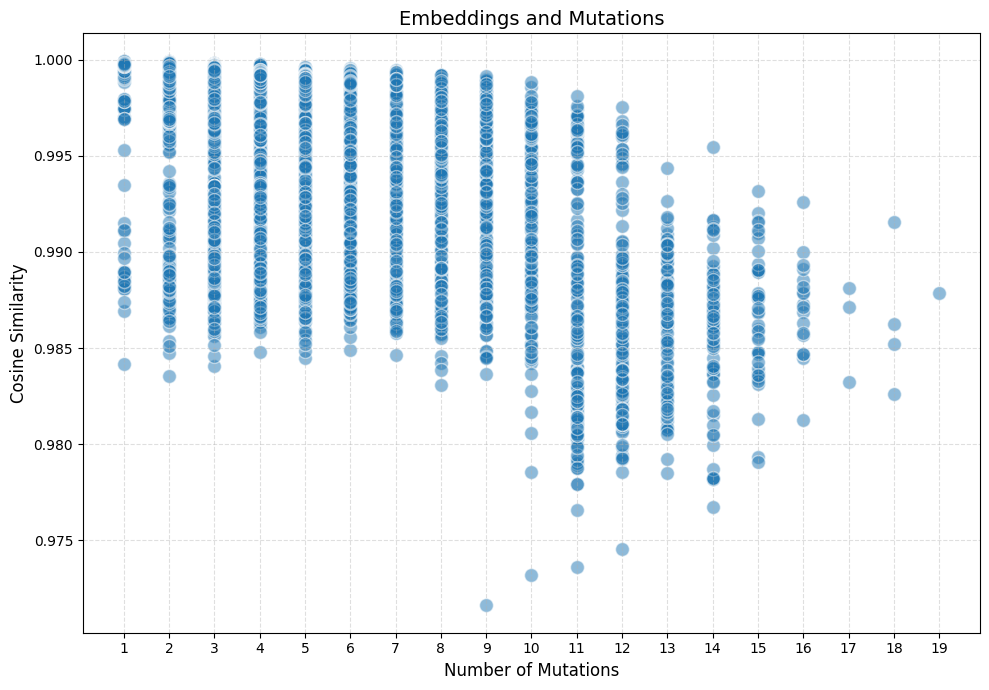

In [32]:
import matplotlib.pyplot as plt

# Streudiagramm
fig, ax = plt.subplots(figsize=(10, 7))

scatter = ax.scatter(
    mutations_and_embeddings_df["mutations"],
    mutations_and_embeddings_df["cosine_similarity"],
    alpha=0.5,
    s=100,  # Marker-Größe ähnlich wie Plotly (12^2 ~ 144; 100 ist vergleichbar)
    edgecolors='w'
)

# Achsentitel und Layout
ax.set_title("Embeddings and Mutations", fontsize=14)
ax.set_xlabel("Number of Mutations", fontsize=12)
ax.set_ylabel("Cosine Similarity", fontsize=12)

# Gitterlinien und Ticks
ax.grid(True, linestyle='--', alpha=0.4)
ax.set_xticks(range(int(mutations_and_embeddings_df["mutations"].min()),
                    int(mutations_and_embeddings_df["mutations"].max()) + 1))

# Exportieren als Bild
plt.tight_layout()
plt.savefig("Embeddings_and_Mutations_SN.png", dpi=300)
plt.show()

<div style="display: flex; justify-content: center; gap: 10px;">
  <img src="pictures/Cosine_Distribution_1.png" width="300">
  <img src="pictures/Cosine_Distribution_3.png" width="300">
  <img src="pictures/Cosine_Distribution_6.png" width="300">
  <img src="pictures/Cosine_Distribution_9.png" width="300">
</div>
<p style="text-align: center;"><strong>Figure 1:</strong> Distributions [Own work]</p>

The diagrams confirm the presumption to a great extent. On average the cosine similarity decreases with increasing number of mutations. So far no unexpected outcome, but of cause there are some outliers. The lowest value of similarity between two proteins is below average of total similarities, which does catch some attention, because one single changing amino acid had a larger effect than various combinations of up to 19 mutations between sequences. The example is a methionine at position 66 replaced by a isoleucine. The size and structure of the amino acids is similar and they are both hydrophobic. This is confirmed by the BLOSUM62-matrix, which says, that mutations between these amino acids are more frequent than average in nature [5]. Without a significant change in function regarding the structure of these amino acids, the question remains, why the mutation had such a great consequence on the cosine similarity. This will be addressed again later, when examining the position relevance and the 3D-structure of the lactamase. 


## 4.3 Relevance per position

The relevance scores calculated in methods can easily be visualized in a diagram with the positions as the x-axis and the relevance values on the y-axis. These scores are then overlaid  on the "mutations per positions" plot for comparison. It does not matter if a relevance value exceeds a mutation bar, because the relevance is scaled by a constant and not directly linked to the mutation count. The overlay is used solely as a reference for visual comparison.

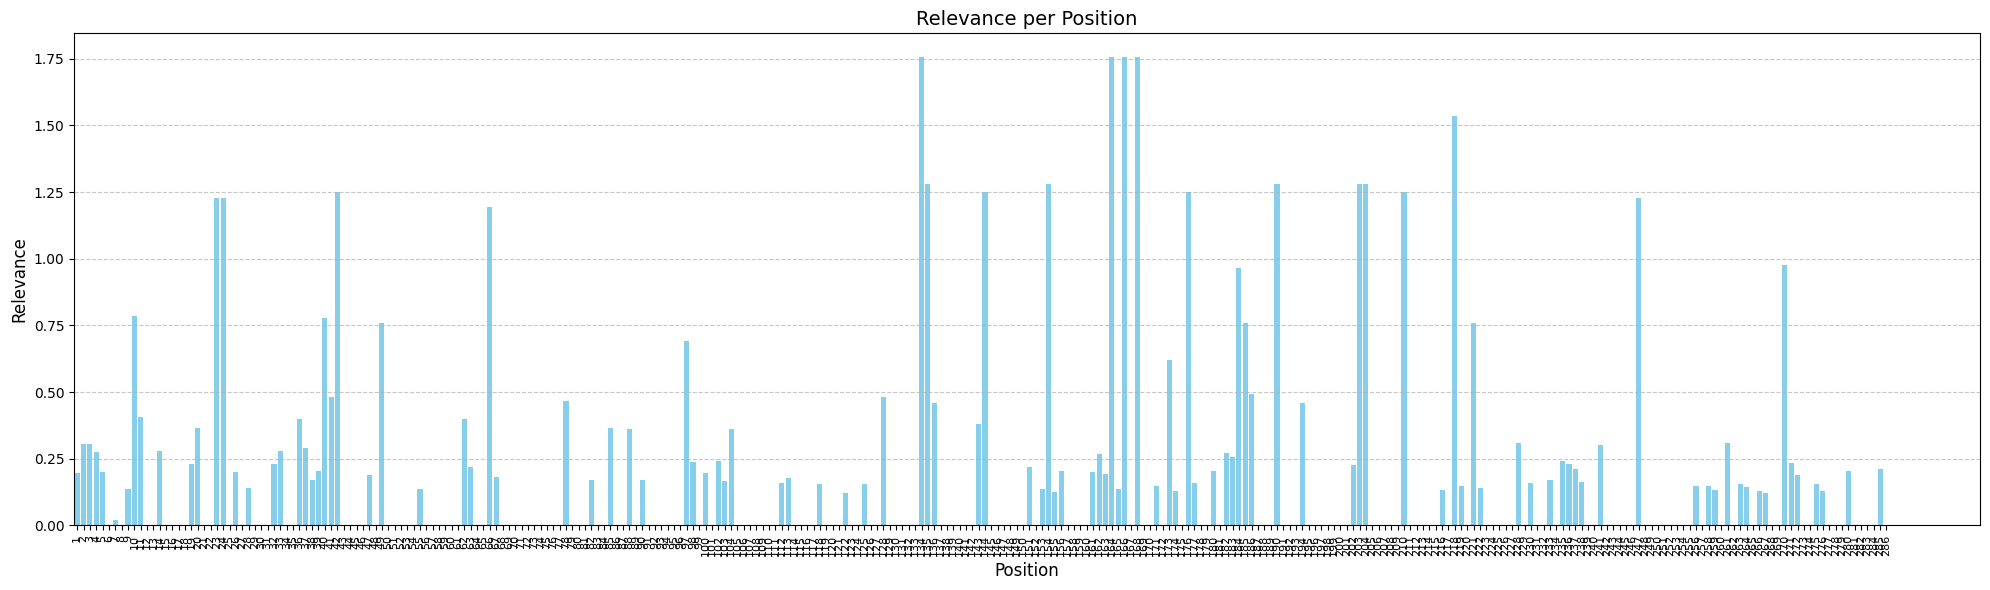

In [31]:
relevance_values = list(weighted_average_relevance.values())
positions = list(weighted_average_relevance.keys())

plt.figure(figsize=(20, 6))  
plt.bar(positions, relevance_values, color="skyblue", width=0.8)

plt.xticks(
    ticks=[pos for pos in positions if pos >= 0],
    labels=[pos for pos in positions if pos >= 0],
    fontsize=8,
    rotation=90
)

plt.xlim(left=0.5)
plt.xlabel("Position", fontsize=12)
plt.ylabel("Relevance", fontsize=12)
plt.title("Relevance per Position", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("Positionrelevance_SN.png")
plt.show()

<div style="text-align: center;">
  <img src="pictures/Merged_Mutation_Relevance.png" width="1200"><br>
  <strong>Figure 3:</strong> Mutations and Relevances [Own work]
</div>

 It could look like the positions where no mutation has taken place, the relevance is zero, but that is not the case. There is simply no data about the relevance, because there is no knowledge of the effects a mutation in those positions would have. On average, residues which mutate often within the family have a rather low relevance, which makes sense. A highly relevant amino acid wouldn't mutate often, because it would likely change or ruin the function causing the resulting protein not to be part of the family anymore. Amino acids that only mutated once or twice within the beta-lactamases often have a high relevance for the same reason, but the data isn't that consistent. A big disadvantage of the relevance calculation, is that with not enough data it can be strongly distorted. The less examples of a mutation in a specific position there are, the more the relevance can be influenced by the replacing amino acids. If there is only one protein with a mutation at position x, then the relevance will depend very much on if the new amino acid replaces the function of the original residue or changes the structure. As a conclusion this method highly increases meaningfulness with increasing data and early interpretations should be treated with care. 
 Nevertheless the results do match earlier concerns. Position 102, which caught attention because there were more than 50 proteins with a base instead of an acid in this position, has indeed got a low relevance. A significant amino acid mutation in a position, relevant for maintaining original function, would have been very unusual. Also position 66, which seemed to have a large effect on cosine similarity in case of a substitution shows a high relevance for protein characteristics.

 ## 4.4 3D-Structure and relevance

 To build a connection between the collected results and the 3D-structure of the TEM-1 beta-lactamase, the relevance score is visualized in pymol as colors. Positions that stayed the same within all active variants remain grey and for residues with mutations a color scale is used, with dark blue as least relevant and red for the most relevant amino acids. 



<div style="display: flex; justify-content: center; gap: 10px;">
  <img src="pictures/pyMOL1.png" width="300">
  <img src="pictures/pyMOL2.png" width="300">
  <img src="pictures/pyMOLsubstrate.png" width="300">
  <img src="pictures/pyMOL66.png" width="300">
</div>
<p style="text-align: center;"><strong>Figure 1:</strong> 3D-structure of TEM-1 beta-lactamase [Own work in PyMOL]</p>

When interpreting visualized data with the protein structure, it's important to consider the location of the active site. Position 68 catalyzes the chemical reaction with the antibiotic [6], it is the grey amino acid in direct contact with the pink substrate. The yellow dotted lines are other connections interacting with it.
Position 66 is the yellow amino acid in the last picture, two residues from position 68. It is very close to the active site, what could explain the high relevance, because amino acids close to the core function of a protein are more likely to alter the according function. Also the red areas all seem to be in the area of the substrate, which for the same reasons could be as expected. Loops, especially on the outside, often have a low to medium relevance. This biologically makes sense, because a mutation wouldn't interact with important structure as much as in integrated secondary structures. 
Of cause there are some questions arising with the 3D-structure. Position 67, directly next to the active site, mutates a lot and has a low relevance. This could potentially result from the original and replacing amino acids (methionine, isoleucine, leucine and valine) all being pretty similar in structure and classification (hydrophobic). 
In general the visualization of position relevance links mutation- and AI-data to the 3D-structure of a protein very nicely and offers a wide for biological interpretation.

## 5 Conclusion and Outlook

Looking at sequences, function and 3D-structure of the beta-lactamase protein family with multiple methods reveals various ideas to gather important information about this and any protein family. Plotting all mutations per position within the active variants sums up the space of possibilities with a similar function elegantly. AI-data of protein similarity makes a further evaluation of mutations possible, like ranking each position in a protein to its likely relevance for structure and function. This can supply valuable insight about how a protein puts its function into practice. Data shows, proteins are distinguished by number of mutations in their structure, which amino acids replace the residues and where the change is located in a protein. 
The developed methods can be used on other protein families as long as a similar database is available. They improve significantly in meaningfulness with increasing amount of data. 
The beta-lactamase enzymes have pretty similar sequences and still with a few mutations slightly different phenotypes can evolve, which makes them flexible against pharmacy and its simultaneously changing antibiotics. Considering this coevolution, it is of great importance to keep observing lactamase variants and researching on their exact function. 

## Bibliography

[1] Catharina Zeil, Michael Widmann, Silvia Fademrecht, Constantin Vogel, Jürgen Pleiss. Network Analysis of Sequence-Function Relationships and Exploration of Sequence Space of TEM β-Lactamases (May 2016)

[2] Thomas Hayes, Roshan Rao, Halil Akin, Nicholas J. Sofroniew, Deniz Oktay, Zeming Lin, Robert Verkuil, Vincent Q. Tran, Jonathan Deaton, Marius Wiggert, Rohil Badkundri, Irhum Shafkat, Jun Gong, Alexander Derry, Raul S. Molina, Neil Thomas, Yousuf A. Khan, Chetan Mishr, Carolyn Kim, Liam J. Bartie, Matthew Nemeth, Patrick D. Hsu, Tom Sercu, Salvatore Candido, Alexander Rives. Simulating 500 million years of evolution with a language model (2025, 16. Januar), DOI: 10.1126/science.ads0

[3] https://www.chrishayduk.com/p/esm3-and-the-future-of-protein-language?utm_source=chatgpt.com

[4] https://de.wikipedia.org/wiki/Β-Lactamasen

[5] https://www.labxchange.org/library/items/lb:LabXchange:24d0ec21:lx_image:1

[6] https://en.wikipedia.org/wiki/Active_site

[7] https://neo4j.com
